In [60]:
import numpy as np
import pandas as pd

# Steps to follow

## 0. Preprocess + EDA + Feature Selection.
## 1. Extract input and outpul cols.
## 2. Scale the values.
## 3. Train test split.
## 4. Train the model.
## 5. Evaluate the model/model selection.
## 6. Deploy the model.

## Step0. Preprocess

In [61]:
df = pd.read_csv("placement.csv")
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [63]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [64]:
df.shape

(100, 3)

## Step0. EDA

In [65]:
import matplotlib.pyplot as plt

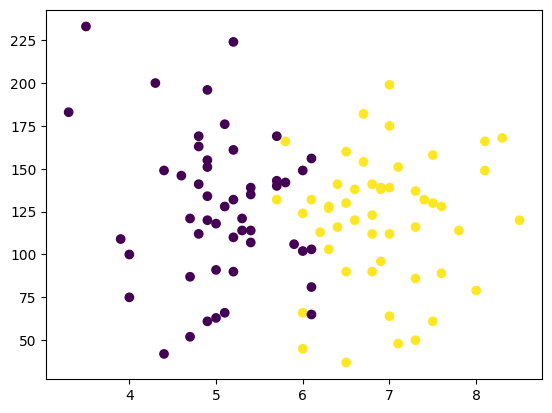

In [66]:
plt.scatter(df["cgpa"], df["iq"], c = df["placement"])

## Step1.
We keep the independent variables in X and keep the depended variables in y

In [67]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [68]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [69]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [70]:
y.shape

(100,)

## Step3.
use train_test_split from sklearn

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [72]:
X_train

,cgpa,iq
41,5.4,114.0
79,6.5,90.0
44,7.5,61.0
31,3.9,109.0
1,5.9,106.0
...,...,...
32,7.0,139.0
46,5.3,114.0
81,5.4,107.0
83,7.5,130.0


In [74]:
X_test

,cgpa,iq
0,6.8,123.0
26,7.0,199.0
72,7.3,116.0
14,6.1,103.0
36,5.7,140.0
38,6.5,160.0
68,4.0,75.0
71,6.1,132.0
97,6.7,182.0
92,5.2,110.0


In [75]:
y_train

41    0
79    1
44    1
31    0
1     0
     ..
32    1
46    0
81    0
83    1
74    1
Name: placement, Length: 90, dtype: int64

In [76]:
y_test

0     1
26    1
72    1
14    0
36    0
38    1
68    0
71    1
97    1
92    0
Name: placement, dtype: int64

## Step2. Scaling the values

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
X_train = scaler.fit_transform(X_train)

In [80]:
X_train

array([[-0.49622133, -0.21052343],
       [ 0.45398973, -0.81043187],
       [ 1.31781796, -1.53532125],
       [-1.79196368, -0.33550435],
       [-0.06430721, -0.41049291],
       [ 2.1816462 , -0.06054632],
       [ 0.3676069 ,  0.46437358],
       [ 1.14505232,  0.36438883],
       [ 0.88590385, -1.46033269],
       [-0.23707286,  1.16426676],
       [-1.01451827, -0.2605158 ],
       [ 1.40420079, -0.83542806],
       [-0.66898698,  0.23940791],
       [ 0.79952102, -0.66045476],
       [ 0.97228667,  0.71433543],
       [-1.1009011 , -0.88542043],
       [ 0.10845843,  0.83931635],
       [ 0.3676069 , -0.16053106],
       [ 1.14505232, -1.81027929],
       [ 0.97228667, -1.86027166],
       [ 0.45398973,  0.18941554],
       [-0.15069004,  1.08927821],
       [-1.01451827,  0.46437358],
       [ 1.40420079,  0.13942317],
       [-0.58260415, -0.03555013],
       [-0.92813545,  0.28940028],
       [-1.36004957,  0.66434306],
       [ 0.10845843, -1.03539754],
       [ 1.83611491,

In [81]:
X_test = scaler.transform(X_test)

In [82]:
X_test

array([[ 0.7131382 ,  0.01444224],
       [ 0.88590385,  1.91415232],
       [ 1.14505232, -0.16053106],
       [ 0.10845843, -0.48548147],
       [-0.23707286,  0.43937739],
       [ 0.45398973,  0.9393011 ],
       [-1.70558086, -1.18537465],
       [ 0.10845843,  0.23940791],
       [ 0.62675538,  1.48921717],
       [-0.66898698, -0.31050817]])

## Step4. Train the model

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
clf = LogisticRegression()

In [85]:
clf.fit(X_train,y_train)

LogisticRegression()

## Step5. Evaluate the model/model selection

In [88]:
y_pred = clf.predict(X_test)

In [87]:
y_test

0     1
26    1
72    1
14    0
36    0
38    1
68    0
71    1
97    1
92    0
Name: placement, dtype: int64

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test, y_pred)

0.9

Plotting the decision bound.

<Axes: >

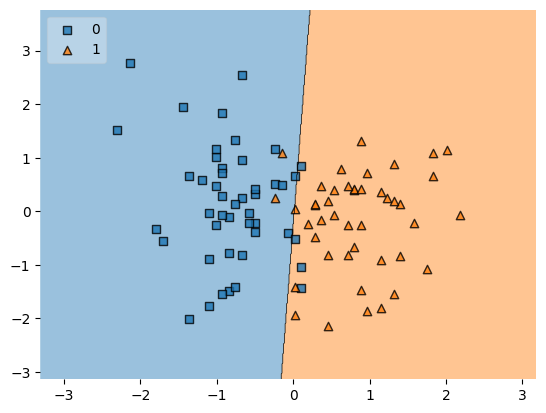

In [91]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf = clf, legend = 2)

## Step5. deploy the model
create the pickle file for the model

In [92]:
import pickle

In [93]:
pickle.dump(clf, open("model.pkl", "wb"))